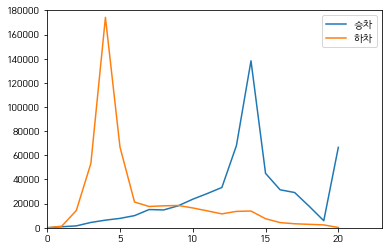

In [3]:
import csv
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = r'C:\Windows\Fonts\HANDotum.ttf'
font = font_manager.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('시간대별.csv', 'r', encoding='cp949')
data= csv.reader(f)
header = next(data)
next(data)

time_ride = {}
for row in data:
    if row[1] not in time_ride:
        time_ride[row[1]] = {}
        for i in range(4, 46, 2):
            time_ride[row[1]][header[i][0:2]]=[]
            time_ride[row[1]][header[i][0:2]].append(int(row[i]))
            time_ride[row[1]][header[i][0:2]].append(int(row[i+1]))
    else:
        time_ride[row[1]][header[i][0:2]][0] += int(row[i])
        time_ride[row[1]][header[i][0:2]][0] += int(row[i+1])

# for key, value in time_ride.items():
#     print('{} : {}'.format(key, value))
times = []
rides = []
quits = []
for key, value in time_ride.items():
    if key == '2호선':
        for time, num in value.items():
            #print('{} : {}'.format(key, value))
            times.append(time)
            rides.append(num[0])
            quits.append(num[1])

plt.plot(rides, label='승차')
plt.plot(quits, label='하차')
plt.ylim([0,180000])
plt.xlim([0,23])
plt.legend()
plt.show()